In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("/Users/mac/Desktop/Telco-Customer-Churn/Telco-Customer-Churn.csv")

In [3]:
#check for null values 
df.isnull().sum()


customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [4]:
df.describe(include="all")

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#check if there any sings or no digital in value morever check the value itself if it srting otherwishe unchanged with in total chargers might cost the error in coverting to numeric 
import re

def clean_numeric_string(value):
    # Remove any characters that are not digits, dots, or minus signs
    if isinstance(value, str):
        return re.sub(r'[^\d.-]', '', value)
    return value

In [7]:
df['TotalCharges'] = df['TotalCharges'].apply(clean_numeric_string)

In [8]:
#change the type of totalchares to intergers Numeric cant be casted 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
#convert the type numeric to float its 
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [10]:
#still to make sure data has no missing values at all 
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# Handle missing values with median has less effect to outliers After  
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
#lets check out data frame looks like 
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# customerID is unnecessary column for analysis and modeling 

df.drop(columns=['customerID'],inplace=True)

In [15]:
df['MultipleLines'].value_counts()

MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64

In [16]:
df["SeniorCitizen"].mode()

0    0
Name: SeniorCitizen, dtype: int64

In [17]:
#change  SeniorCitizen column type to object 
df['SeniorCitizen']=df['SeniorCitizen'].astype(object)

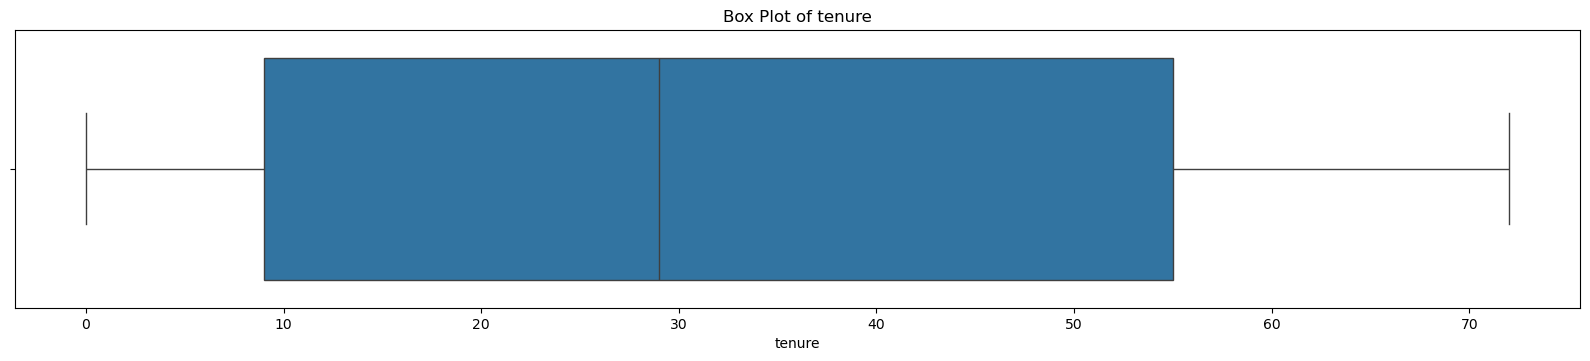

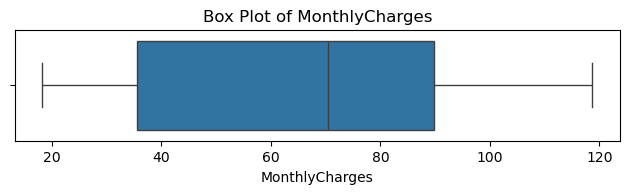

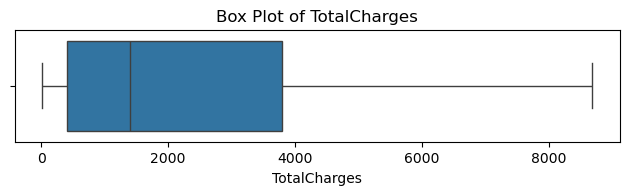

In [18]:
#check for outliers the one are always making the different and see how are the data distributited 
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Plot box plots for all numerical columns
plt.figure(figsize=(16, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()


In [19]:
##let's check how our customers make thier payments just wondering why people still pay with mailed check 
#are they seniors 
df['PaymentMethod'].value_counts()

PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

In [20]:
#lets check how are the seniors paying their bills 
#seniors_payment_mothed=df.groupby(['PaymentMethod','SeniorCitizen']]).sum()


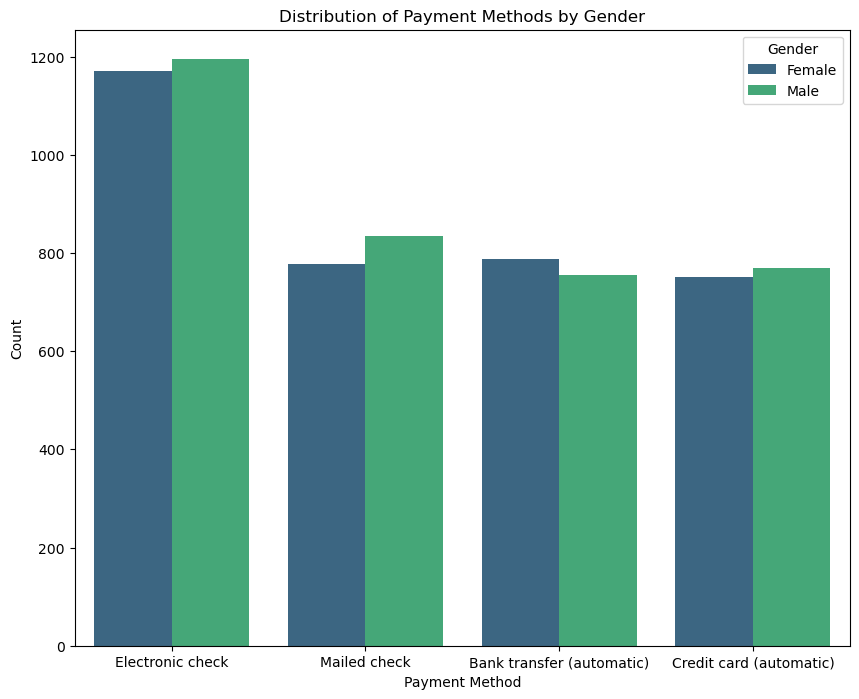

In [21]:
# Plot count of each payment method by gender
plt.figure(figsize=(10, 8))
sns.countplot(x='PaymentMethod', hue='gender', data=df, palette='viridis')
plt.title('Distribution of Payment Methods by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Count')
#plt.xticks(rotation=45) 
plt.legend(title='Gender')
plt.savefig("Payement Mothods Distrubtion")
plt.show()


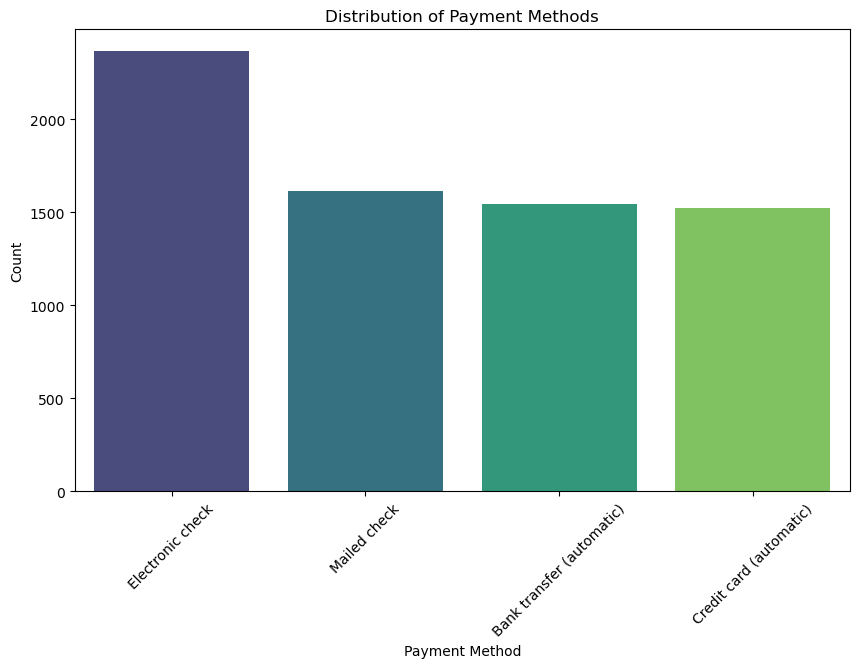

In [22]:


import matplotlib.pyplot as plt
import seaborn as sns

# Plot count of each payment method
plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', data=df, palette='viridis')
plt.title('Distribution of Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.show()


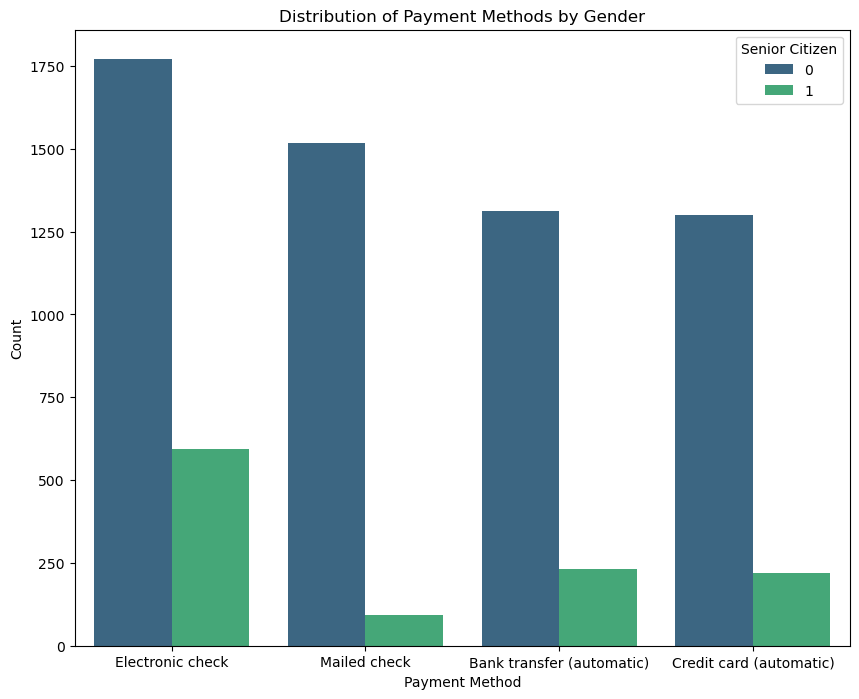

In [23]:
#lets check how are the seniors paying their bills
# Plot count of each payment method by gender
plt.figure(figsize=(10, 8))
sns.countplot(x='PaymentMethod', hue='SeniorCitizen', data=df, palette='viridis')
plt.title('Distribution of Payment Methods by Gender')
plt.xlabel('Payment Method')
plt.ylabel('Count')
#plt.xticks(rotation=45) 
plt.legend(title='Senior Citizen')
plt.savefig("Payement Mothods Distrubtion")
plt.show()


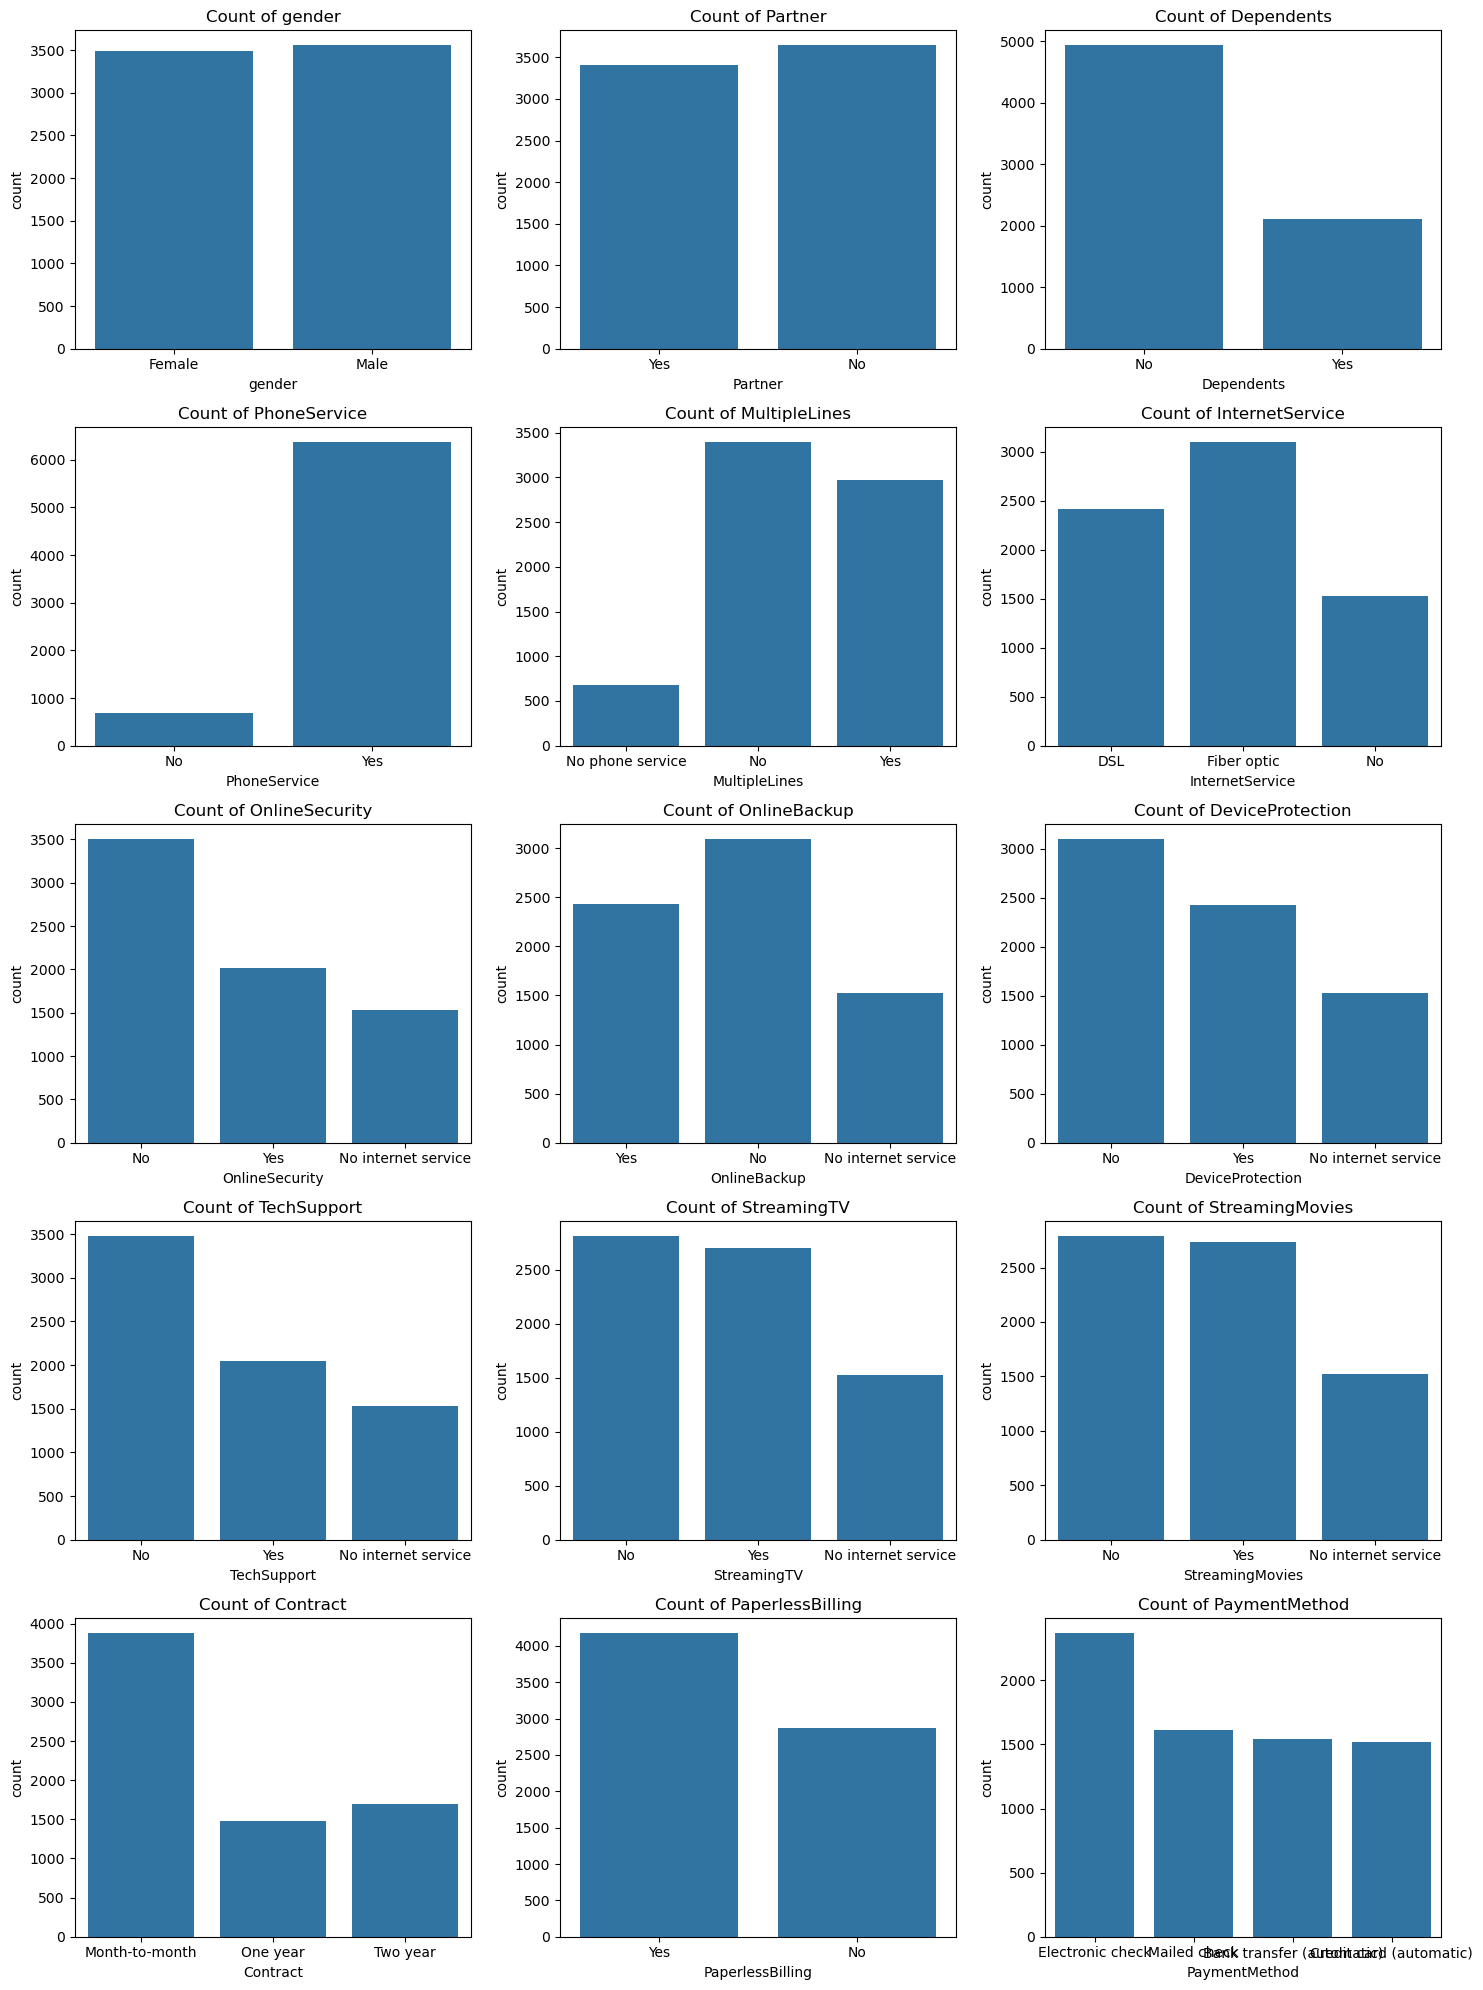

In [24]:
# Count plots for categorical features
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(x=feature, data=df, ax=axes[i])
    axes[i].set_title(f'Count of {feature}')
    axes[i].set_xticklabels(axes[i].get_xticklabels())

plt.tight_layout()
plt.savefig("All Features counts")
plt.show()


In [25]:
#lest calucalte churn rate which means the customers who churned out of total our customers 

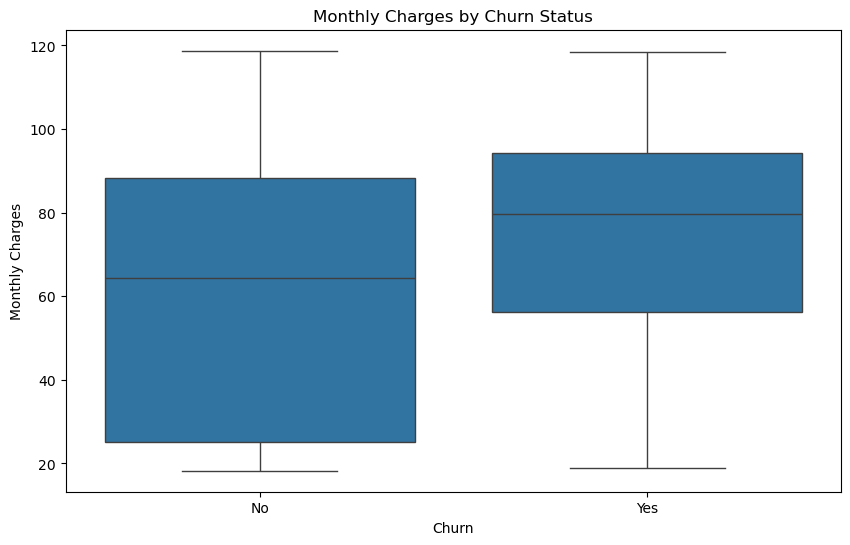

In [26]:
# Box plot to show the distribution of MonthlyCharges by Churn
plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()



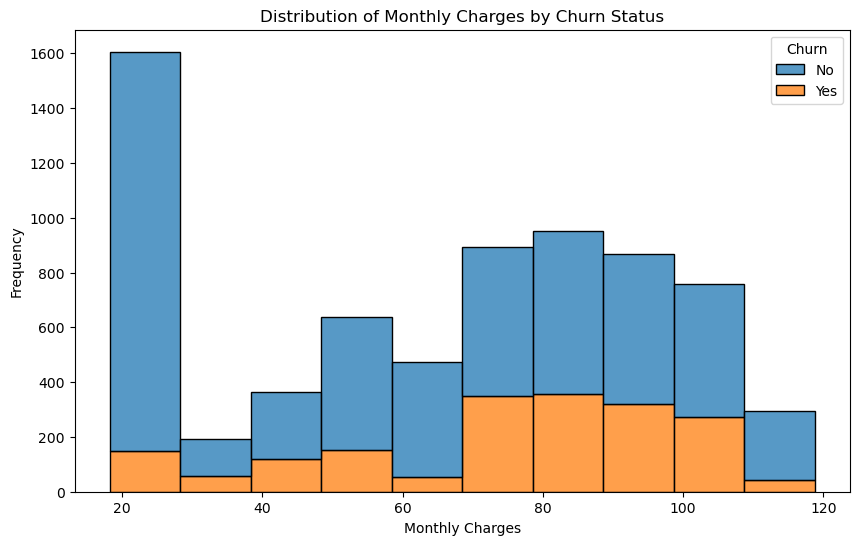

In [27]:
# Histogram to show the distribution of MonthlyCharges for each Churn status
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=10)
plt.title('Distribution of Monthly Charges by Churn Status')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.show()



Churn Distribution:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64

Churn by Gender:
gender  Churn
Female  No       0.730791
        Yes      0.269209
Male    No       0.738397
        Yes      0.261603
Name: proportion, dtype: float64


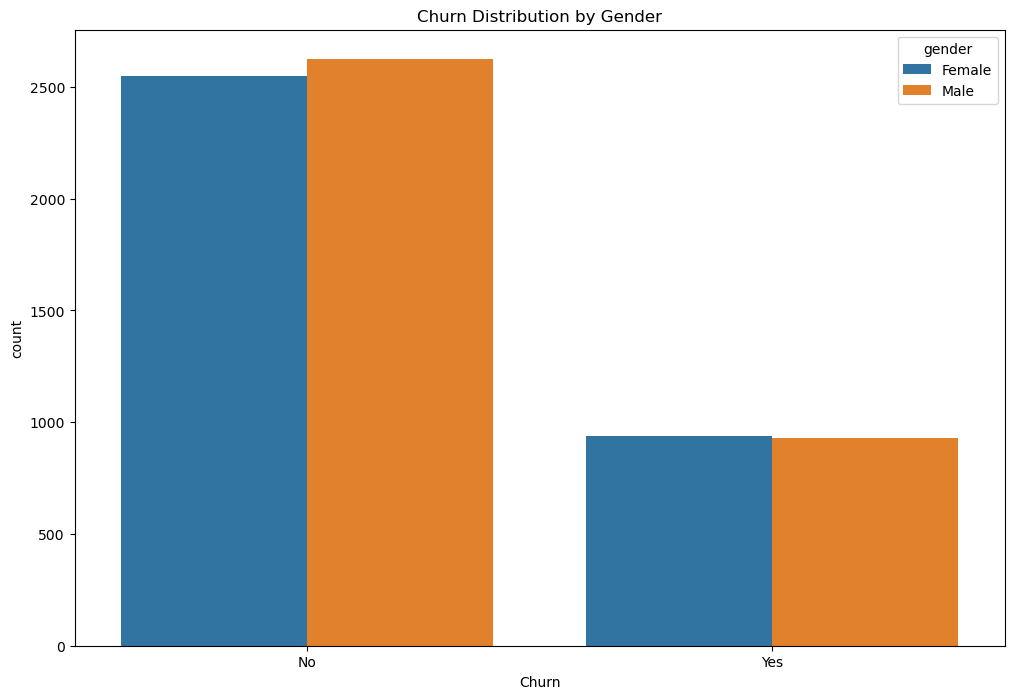

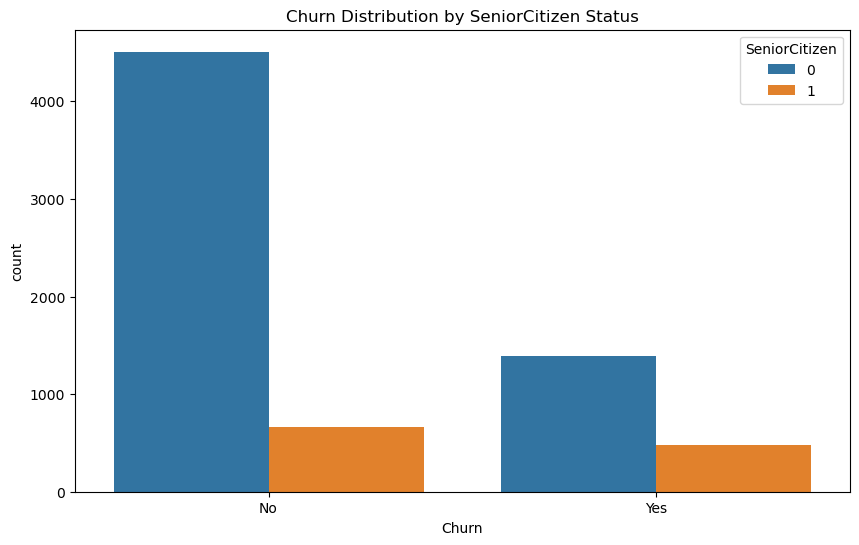

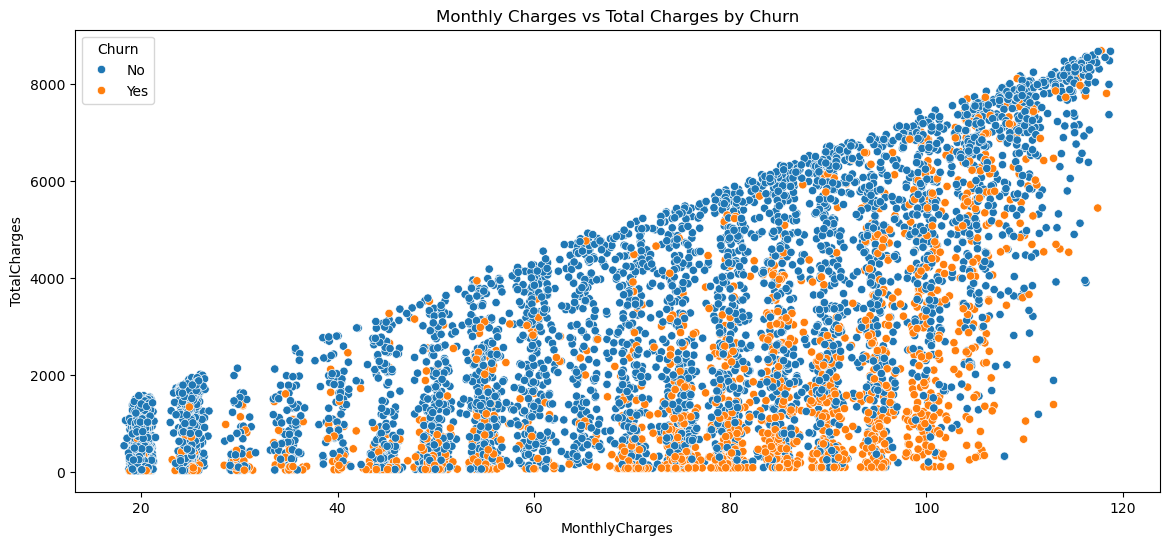

In [28]:
# Churn distribution
print("\nChurn Distribution:")
print(df['Churn'].value_counts(normalize=True))

# Churn by categorical features
print("\nChurn by Gender:")
print(df.groupby('gender')['Churn'].value_counts(normalize=True))

# Visualize churn distribution by categorical features
plt.figure(figsize=(12, 8))
sns.countplot(x='Churn', hue='gender', data=df)
plt.title('Churn Distribution by Gender')
plt.show()

# Compare churn rate for senior citizens vs non-senior citizens
plt.figure(figsize=(10, 6))
sns.countplot(x='Churn', hue='SeniorCitizen', data=df)
plt.title('Churn Distribution by SeniorCitizen Status')
plt.show()

# MonthlyCharges vs TotalCharges by Churn
plt.figure(figsize=(14, 6))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Churn', data=df)
plt.title('Monthly Charges vs Total Charges by Churn')
plt.show()


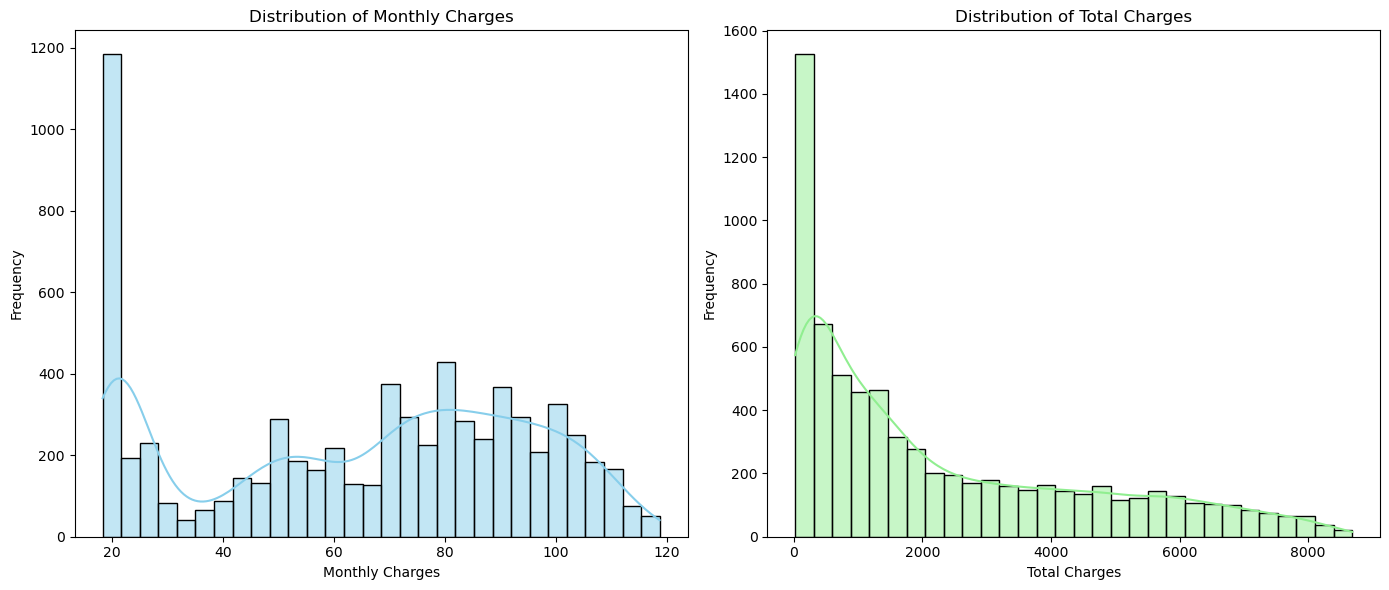

In [29]:
#Understand Customer Spending bhavior:
# Plot histograms for MonthlyCharges and TotalCharges
plt.figure(figsize=(14, 6))

# MonthlyCharges histogram
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')

# TotalCharges histogram
plt.subplot(1, 2, 2)
sns.histplot(df['TotalCharges'].dropna(), bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Total Charges')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [30]:
# Example of creating interaction features
df['ChargeRatio'] = df['TotalCharges'] / (df['MonthlyCharges'] + 1)  # Adding 1 to avoid division by zero

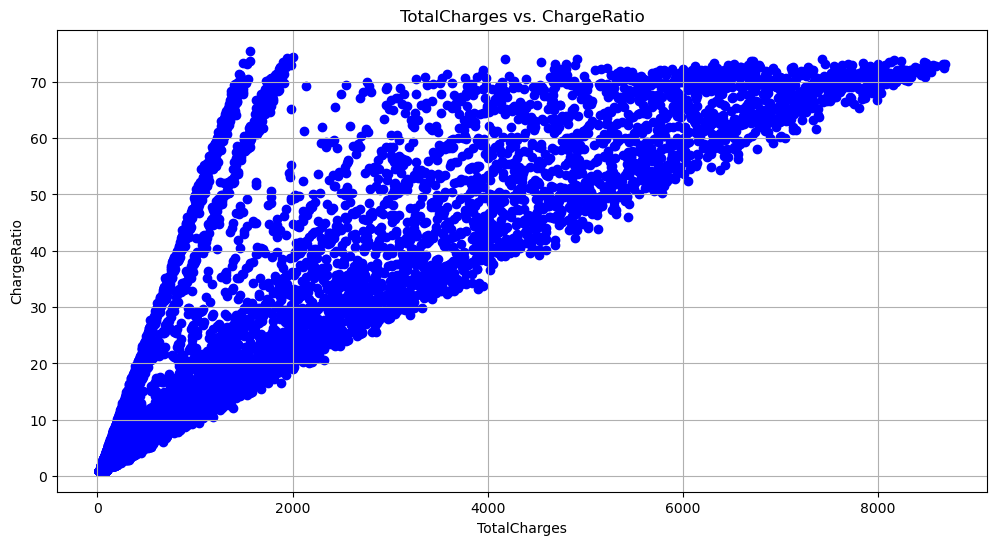

In [31]:


# Plot TotalCharges vs. ChargeRatio
plt.figure(figsize=(12, 6))
plt.scatter(df['TotalCharges'], df['ChargeRatio'], color='blue')
plt.title('TotalCharges vs. ChargeRatio')
plt.xlabel('TotalCharges')
plt.ylabel('ChargeRatio')
plt.grid(True)
plt.show()


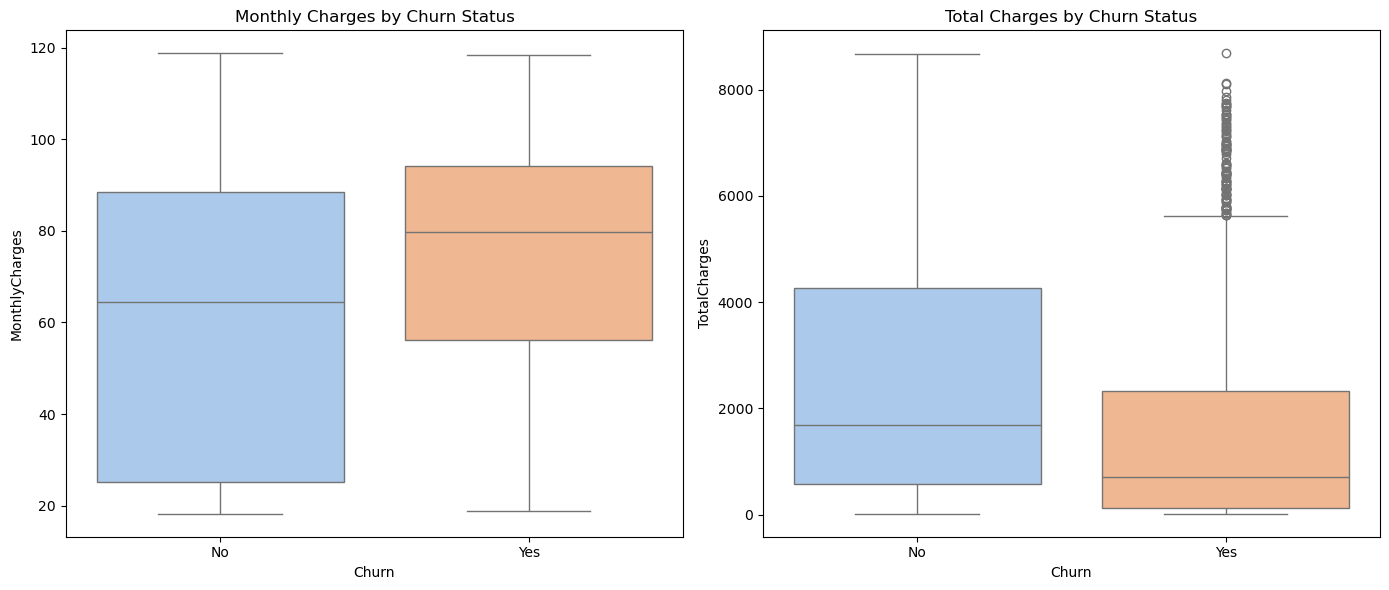

In [32]:
# Compare MonthlyCharges and TotalCharges by Churn
plt.figure(figsize=(14, 6))

# MonthlyCharges by Churn
plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='pastel')
plt.title('Monthly Charges by Churn Status')

# TotalCharges by Churn
plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='TotalCharges', data=df, palette='pastel')
plt.title('Total Charges by Churn Status')

plt.tight_layout()
plt.savefig("Customers Monthy & Total Charges by Churn Status  ")
plt.show()


In [39]:
#Created DataFrame with Churned customer only 
churn_yes = df[df['Churn'] == 'Yes']

In [34]:
import numpy as np

# Compute the boxplot statistics manually
data = churn_yes['TotalCharges'].values
median = np.median(data)
q1 = np.percentile(data, 25)
q3 = np.percentile(data, 75)
iqr = q3 - q1
whisker_low = q1 - 1.5 * iqr
whisker_high = q3 + 1.5 * iqr

# Display the computed statistics
print(f"Median: {median}")
print(f"Q1 (25th percentile): {q1}")
print(f"Q3 (75th percentile): {q3}")
print(f"IQR (Interquartile Range): {iqr}")
print(f"Lower Whisker Limit: {whisker_low}")
print(f"Upper Whisker Limit: {whisker_high}")


Median: 703.55
Q1 (25th percentile): 134.5
Q3 (75th percentile): 2331.3
IQR (Interquartile Range): 2196.8
Lower Whisker Limit: -3160.7000000000003
Upper Whisker Limit: 5626.5


In [44]:
#Created outlier_data_frame to see why these people are churned 
df_outliers = churn_yes[(churn_yes['TotalCharges'] < whisker_low) | (churn_yes['TotalCharges'] > whisker_high)]

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

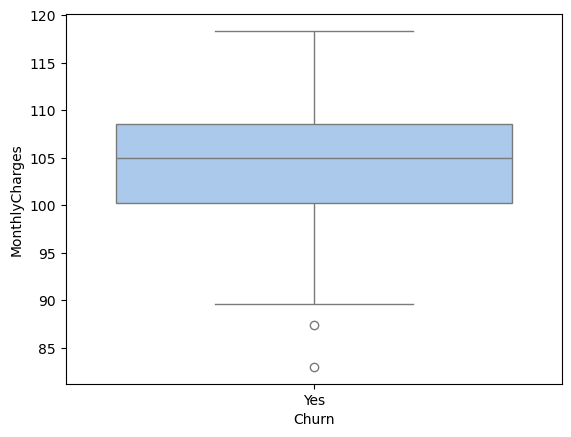

In [45]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_outliers, palette='pastel')

In [53]:
churn_yes.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'ChargeRatio'],
      dtype='object')

In [52]:
print(churn_yes.dtypes)

gender               object
SeniorCitizen        object
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
ChargeRatio         float64
dtype: object


In [55]:
encoded_churn_yes= pd.get_dummies(churn_yes, columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'])


,tenure,MonthlyCharges,TotalCharges,ChargeRatio,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
2,2,53.85,108.15,1.971741,False,True,True,False,True,False,...,True,False,False,False,True,False,False,False,True,True
4,2,70.70,151.65,2.115063,True,False,True,False,True,False,...,True,False,False,False,True,False,False,True,False,True
5,8,99.65,820.50,8.152012,True,False,True,False,True,False,...,True,False,False,False,True,False,False,True,False,True
8,28,104.80,3046.05,28.790643,True,False,True,False,False,True,...,True,False,False,False,True,False,False,True,False,True
13,49,103.70,5036.30,48.102197,False,True,True,False,True,False,...,True,False,False,False,True,True,False,False,False,True


In [58]:
# Calculate correlation matrix
correlation_matrix = encoded_churn_yes.corr()


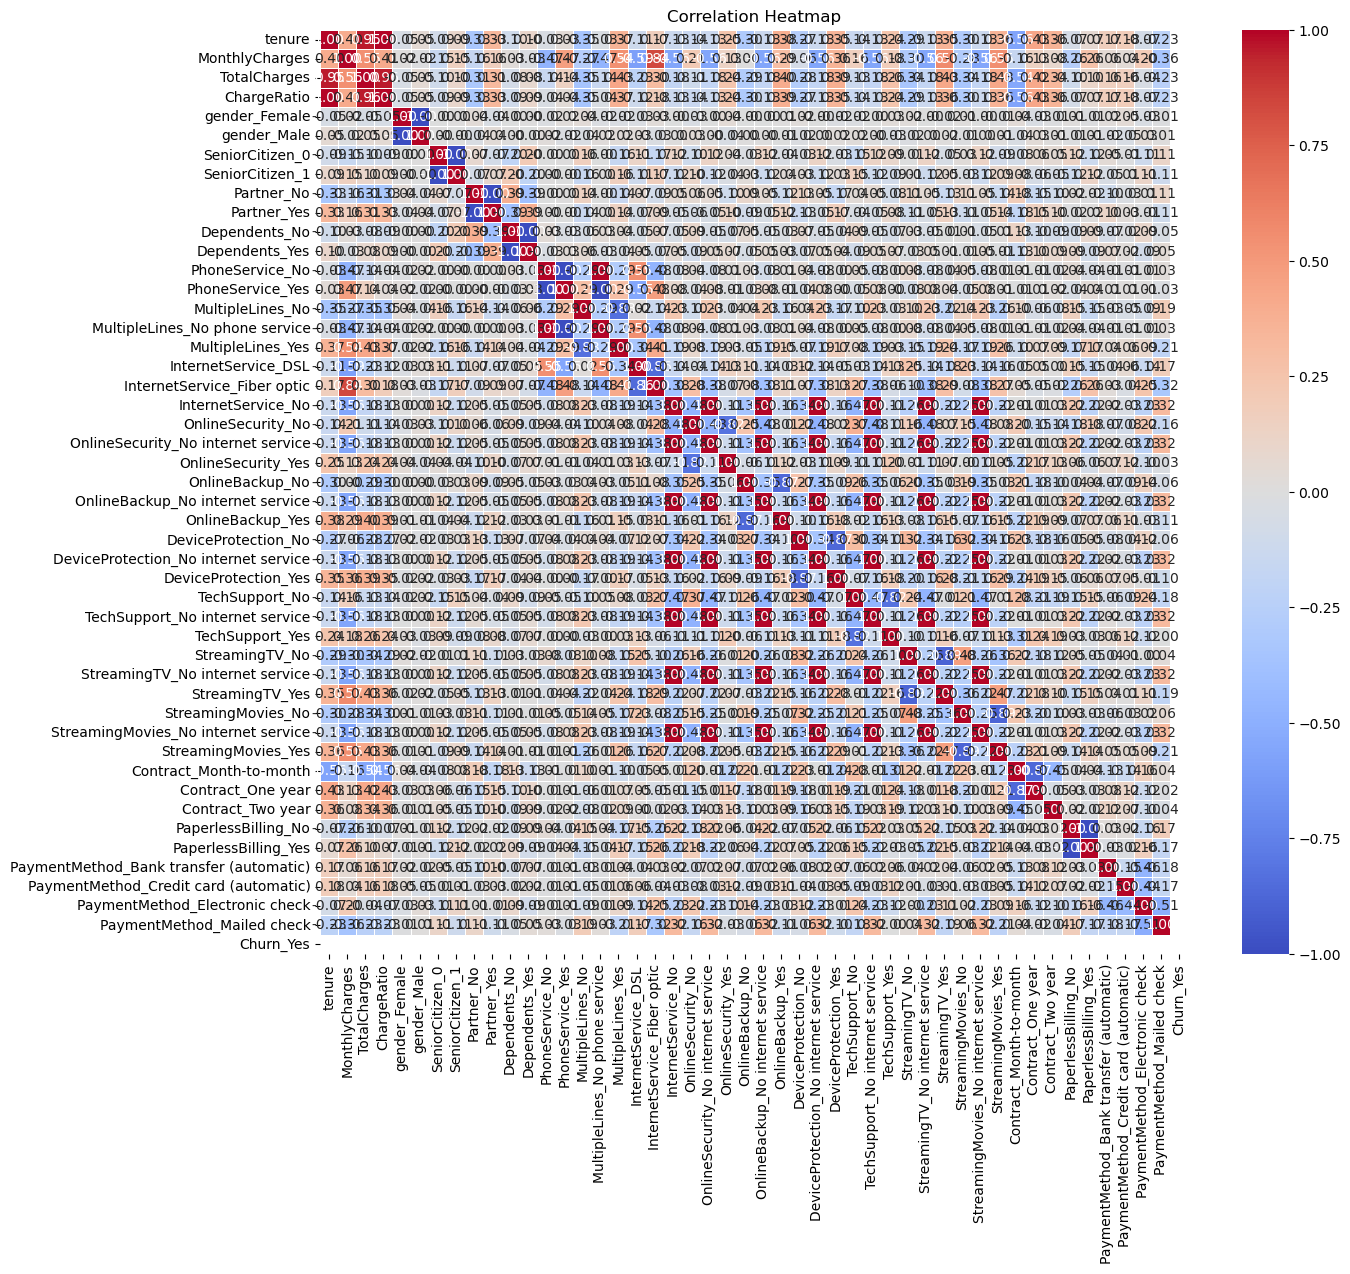

In [62]:
# Set up the matplotlib figure
plt.figure(figsize=(14, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Set title and labels
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
#check correlation between categorical 
"""
import numpy as np
import scipy.stats as stats

def cramers_v(x, y):
    # Compute the Cramer's V statistic for categorical features
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    k = min(confusion_matrix.shape) - 1
    return np.sqrt(chi2 / (n * k))

# Example for 'Churn' vs. 'InternetService'
cramers_v_value = cramers_v(encoded_churn_yes['Churn'], encoded_churn_yes['InternetService'])
print(f'Cramér\'s V between Churn and InternetService: {cramers_v_value:.2f}')
"""


In [37]:
#Remove outliers 
# Filter out outliers for MonthlyCharges and TotalCharges
df_cleaned_churn_yes = churn_yes[(churn_yes['TotalCharges'] >= whisker_low) & (churn_yes['TotalCharges'] <= whisker_high)
]

In [ ]:
df_cleaned_churn_yes

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

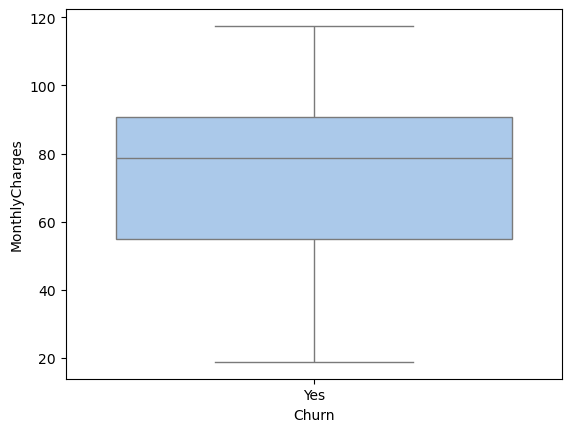

In [38]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_cleaned_churn_yes, palette='pastel')

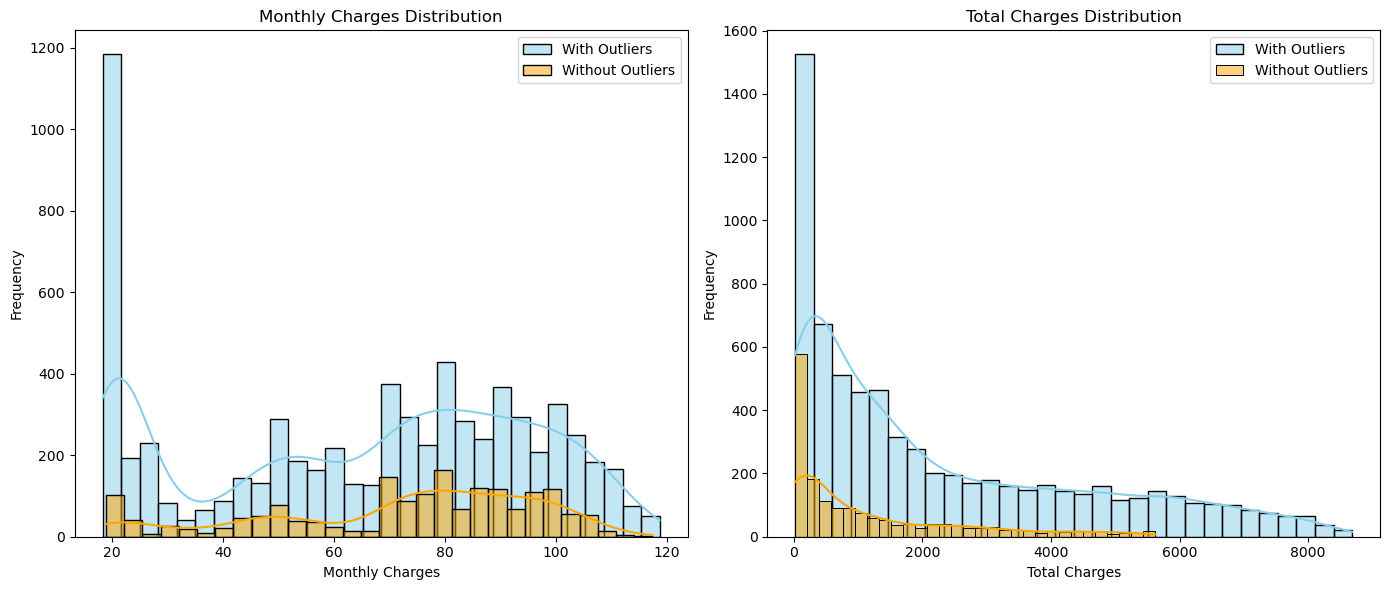

In [47]:
# Plot histograms for MonthlyCharges and TotalCharges for churned customers
plt.figure(figsize=(14, 6))

# MonthlyCharges histogram
plt.subplot(1, 2, 1)
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='skyblue', label='With Outliers')
sns.histplot(df_cleaned_churn_yes['MonthlyCharges'], bins=30, kde=True, color='orange', label='Without Outliers')
plt.title('Monthly Charges Distribution')
plt.xlabel('Monthly Charges')
plt.ylabel('Frequency')
plt.legend()

# TotalCharges histogram
plt.subplot(1, 2, 2)
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='skyblue', label='With Outliers')
sns.histplot(df_cleaned_churn_yes['TotalCharges'], bins=30, kde=True, color='orange', label='Without Outliers')
plt.title('Total Charges Distribution')
plt.xlabel('Total Charges')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
# Histogram
plt.figure(figsize=(12, 6))
plt.hist(df['ChargeRatio'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of ChargeRatio')
plt.xlabel('ChargeRatio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
plt.boxplot(df['ChargeRatio'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='lightgreen', color='black'))
plt.title('Boxplot of ChargeRatio')
plt.xlabel('ChargeRatio')
plt.grid(True)
plt.show()


In [ ]:
#since the contract is oridnal 
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['ContractEncoded'] = le.fit_transform(df['Contract'])



Detailed Analysis and Implications
Customer Behavior Insights

### Tenure Influence:
    The strong correlation between ChargeRatio and Tenure reinforces the idea that as customers stay longer, their total charges relative to monthly charges increase. This trend is consistent with the observation that customers with longer tenure or longer contracts tend to have higher ChargeRatio values.
### Hypotheses and Actions
`Customer Segmentation:

    Segment customers based on their contract type and tenure to tailor marketing strategies. For instance, offer incentives for long-term contracts to attract customers with higher ChargeRatio potential.
## Churn Analysis:

    Investigate whether customers with higher ChargeRatio have a higher or lower churn rate. If high ChargeRatio correlates with lower churn, consider strategies to retain such high-value customers.
## Revenue Optimization:

    Use ChargeRatio as a feature to identify high-value customers who contribute significantly to total charges. Develop targeted promotions or loyalty programs to enhance customer retention and revenue.
    Visualization for Better Understanding


### 1. Correlation Between ChargeRatio and Tenure
    Correlation Value: 0.9987

            Interpretation: A correlation of 0.9987 is extremely close to 1, which indicates a very strong positive 
            relationship between ChargeRatio and Tenure. This means that as Tenure increases, ChargeRatio also increases 
            almost linearly.
            
    Implications:
    Longer Tenure: Customers who have been with the company for a longer period tend to have a higher ChargeRatio. This suggests that these customers accumulate more total charges relative to their monthly charges over time.

In [ ]:
correlation = df[['ChargeRatio', 'tenure']].corr().iloc[0, 1]
print(f"Correlation between ChargeRatio and Tenure: {correlation}")

# Compare ChargeRatio across different contract types
print(df.groupby('Contract')['ChargeRatio'].mean())


In [ ]:
import seaborn as sns

# Scatter plot of ChargeRatio vs. Tenure
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='tenure', y='ChargeRatio', hue='Contract', palette='viridis')
plt.title('ChargeRatio vs. Tenure by Contract Type')
plt.xlabel('Tenure (Months)')
plt.ylabel('ChargeRatio')
plt.legend(title='Contract Type')
plt.grid(True)
plt.show()

# Boxplot for ChargeRatio by Contract Type
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Contract', y='ChargeRatio', palette='viridis')
plt.title('ChargeRatio Distribution by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('ChargeRatio')
plt.grid(True)
plt.show()


### 2. Average ChargeRatio by Contract Type
    Contract Types and Average ChargeRatio:
        Month-to-Month: 17.74
        One Year: 41.28
        Two Year: 55.83
# Interpretation:

### Month-to-Month Contracts: 
    Customers on month-to-month contracts have the lowest average ChargeRatio of 17.74. This might indicate that these customers have a more balanced ratio of total charges to monthly charges, possibly due to less commitment and potentially lower total charges accrued over time.
### One Year Contracts: 
    Customers on one-year contracts have a higher average ChargeRatio of 41.28. This suggests that these customers tend to accumulate a higher total amount of charges relative to their monthly payments compared to month-to-month customers.
### Two Year Contracts: 
    Customers on two-year contracts have the highest average ChargeRatio of 55.83. This indicates that these customers, who are committed for a longer term, accrue even more total charges relative to their monthly charges. This could be due to the longer duration allowing more time for total charges to accumulate.

### Contract Duration:
    * Long-Term Contracts: 
        Customers on longer-term contracts (one year or two years) have higher ChargeRatio values. This suggests that  
        such contracts may lead to higher total spending relative to monthly spending, potentially due to       
        customers receiving more services or having higher service levels over a longer period.
    
    * Short-Term Contracts: 
        Month-to-month customers have a significantly lower ChargeRatio, possibly due to shorter commitment periods and  
        potentially lower total spending.



### 2. Calculate Churn Rates by ChargeRatio Ranges
    You can segment customers into different ranges of ChargeRatio and then calculate the churn rate for each range. This will help you understand how churn rates vary with different levels of ChargeRatio.

    Step-by-Step Analysis
    Define ChargeRatio Ranges

    Segment the ChargeRatio into bins or ranges. This could be done using quantiles, fixed ranges, or based on the distribution of ChargeRatio.




In [ ]:
# Define ranges or bins for ChargeRatio
bins = [0, 20, 40, 60, 80]
labels = ['Low', 'Medium-Low', 'Medium-High', 'High']
df['ChargeRatioCategory'] = pd.cut(df['ChargeRatio'], bins=bins, labels=labels)


In [ ]:
print(df['ChargeRatioCategory'].value_counts())


In [ ]:
"""
bins = [df['ChargeRatio'].quantile(0), 
        df['ChargeRatio'].quantile(0.25), 
        df['ChargeRatio'].quantile(0.50), 
        df['ChargeRatio'].quantile(0.75), 
        df['ChargeRatio'].quantile(1)]
labels = ['Q1', 'Q2', 'Q3', 'Q4']
df['ChargeRatioCategoryQ'] = pd.cut(df['ChargeRatio'], bins=bins, labels=labels)
"""

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['ChargeRatio'], bins=30, kde=True)
plt.title('Distribution of ChargeRatio')
plt.xlabel('ChargeRatio')
plt.ylabel('Frequency')
plt.show()


### Hypotheses and Actions
`Customer Segmentation:

    Segment customers based on their contract type and tenure to tailor marketing strategies. For instance, offer incentives for long-term contracts to attract customers with higher ChargeRatio potential.

In [ ]:
from sklearn.cluster import KMeans

X = df[['ChargeRatio']]
# Fit KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_

print(df.groupby('Cluster')['ChargeRatio'].mean())

In [ ]:
print(df['Cluster'].value_counts())

In [ ]:
print("Inertia:", kmeans.inertia_)

In [ ]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", silhouette_avg)


### Insights:
    High-Value vs. Low-Value Customers:

    * Cluster 1 likely contains high-value or high-usage customers due to their significantly higher ChargeRatio.
    * Cluster 0 likely contains low-value or low-usage customers with a much lower ChargeRatio.
    
#### Moderate-Value Customers:

*   Cluster 2 includes customers with a moderate level of ChargeRatio, potentially indicating a balanced usage or value level.
    Potential Actions:
    
### Targeted Retention Strategies:
    High-Value Customers (Cluster 1): Develop loyalty programs or exclusive offers to retain these valuable customers. Since they have a high ChargeRatio, they are crucial for revenue.
### Moderate-Value Customers (Cluster 2): 
    Consider targeted marketing strategies to increase their engagement or upsell additional services.
    Low-Value Customers (Cluster 0): Investigate why these customers have a low ChargeRatio. It may be beneficial to offer    
    promotions or enhancements to increase their usage or value.


In [ ]:
# Calculate churn rates by cluster
churn_rates = df.groupby('Cluster')['Churn'].mean()
print("Churn Rates by Cluster:")
print(churn_rates)

In [ ]:

clusters = ['Cluster 0', 'Cluster 1', 'Cluster 2']
churn_rates = [0.436, 0.097, 0.209]

# Plot
plt.figure(figsize=(10, 6))
plt.bar(clusters, churn_rates, color=['red', 'green', 'blue'])
plt.xlabel('Cluster')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Customer Cluster')
plt.ylim(0, 0.5)  
plt.show()



### Cluster 0 (43.6% Churn Rate):

    High Churn Rate: This cluster has the highest churn rate. A churn rate of 43.6% indicates that nearly half of the 
    customers in this cluster have churned.
    Actionable Insight: Investigate the characteristics of this cluster. It may contain factors that contribute to higher 
    churn, such as poor customer service, higher charges, or lower satisfaction. 
    Consider implementing retention strategies or improving service quality for this cluster.
### Cluster 1 (9.7% Churn Rate):

    Low Churn Rate: This cluster has the lowest churn rate. A churn rate of 9.7% suggests that customers in this cluster are 
    relatively more stable and less likely to churn.
    Actionable Insight: Analyze what makes this cluster less prone to churn. Look for positive factors such as better service, 
    lower charges, or higher satisfaction. Use these insights to enhance other clusters or improve overall service quality.
### Cluster 2 (20.9% Churn Rate):

    Moderate Churn Rate: This cluster has a moderate churn rate, which is higher than Cluster 1 but lower than Cluster 0.
    Actionable Insight: This cluster may be in a transitional phase between high and low churn. Look into specific features or 
    factors that affect this cluster’s churn rate. Tailor interventions based on the factors contributing to the churn rate in     this cluster.

In [ ]:
#convert churn to int for polting the categoris churn rate for each 
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [ ]:
df['Churn']=df['Churn'].astype(int)

In [ ]:
df.columns

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Sample data
# df = pd.read_csv('your_data.csv')  # Load your data

# Ensure 'Churn' column is in the DataFrame and coded as 0 and 1
# If 'Churn' is not numeric, you'll need to convert it

categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                        'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                        'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
                        'PaperlessBilling', 'PaymentMethod']

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 20))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    # Group by feature and calculate the churn rate
    churn_rates = df.groupby(feature)['Churn'].mean().reset_index()
    
    # Sort values by churn rate for better visualization
    churn_rates = churn_rates.sort_values(by='Churn', ascending=False)
    
    # Plot churn rates
    sns.barplot(x=feature, y='Churn', data=churn_rates, ax=axes[i])
    axes[i].set_title(f'Churn Rate by {feature}')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig("Churn Rates by Feature.png")
plt.show()


In [ ]:
# Plot the distribution of churn rates
plt.figure(figsize=(12, 6))
sns.histplot(churn_rates['Churn'], bins=20, kde=True)
plt.title('Distribution of Churn Rates Across Categories')
plt.xlabel('Churn Rate')
plt.ylabel('Frequency')
plt.show()

In [ ]:
churn_rates.head()

In [ ]:
# Sort categories by churn rate
sorted_churn_rates = churn_rates.sort_values(by='Churn', ascending=False)

# Display the top categories with the highest churn rates
print(churn_rates)


In [ ]:
df.head()

In [ ]:
df_encoded = pd.get_dummies(df_churn, columns=[
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
])

In [ ]:
df_encoded.head()

In [ ]:
df_encoded = df_encoded.drop('customerID', axis=1)

In [ ]:
df_encoded = df_encoded.astype(int)

In [ ]:
df_encoded.head()

In [ ]:
cluster_analysis = df_encoded.groupby('Cluster').mean()
print(cluster_analysis)

In [ ]:

# Plot results for visualization
plt.figure(figsize=(12, 6))

# Plot MonthlyCharges by Cluster
plt.subplot(1, 2, 1)
df_encoded.groupby('Cluster')['MonthlyCharges'].mean().plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Cluster')
plt.ylabel('Average Monthly Charges')
plt.title('Average Monthly Charges by Cluster')

# Plot Tenure by Cluster
plt.subplot(1, 2, 2)
df_encoded.groupby('Cluster')['tenure'].mean().plot(kind='bar', color=['blue', 'green', 'red'])
plt.xlabel('Cluster')
plt.ylabel('Average Tenure')
plt.title('Average Tenure by Cluster')

plt.tight_layout()
plt.show()

Cluster Analysis Overview
Cluster 0
SeniorCitizen: 15.2% are senior citizens.
Tenure: Average of ~7.5 months.
MonthlyCharges: Average of $56.57.
TotalCharges: Average of $441.37.
Churn Rate: 43.6% (high churn rate).
ChargeRatio: 6.73.
Feature Breakdown:

Gender Distribution: Nearly equal male (50.2%) and female (49.8%).
Partner Status: Higher percentage of customers without a partner (71.0%) compared to those with a partner (28.9%).
Dependents: Not provided in the summary, but could be analyzed similarly.
Internet Service: Likely a mix of DSL and Fiber, with a majority having Fiber optic.
Contract Type: Predominantly month-to-month contracts (87.5%).
Payment Method: Higher use of Electronic check (43.2%) and Mailed check (33.1%).
Other Services: Lower adoption of online security, backup, and tech support.
Insights:

High Churn: This cluster has a high churn rate. The short average tenure (7.5 months) and the high percentage of month-to-month contracts suggest customers in this cluster are more likely to leave after a short period.
Service Utilization: Customers have moderate monthly charges and a relatively low charge ratio, indicating they may not be utilizing premium services.
Cluster 1
SeniorCitizen: 16.6% are senior citizens.
Tenure: Average of ~62.8 months.
MonthlyCharges: Average of $73.79 (highest).
TotalCharges: Average of $4692.93 (highest).
Churn Rate: 9.7% (low churn rate).
ChargeRatio: 61.36.
Feature Breakdown:

Gender Distribution: Nearly equal male (51.1%) and female (48.9%).
Partner Status: Higher percentage of customers with a partner (71.4%).
Dependents: Likely similar distribution to partner status.
Internet Service: Predominantly Fiber optic.
Contract Type: A mix of contract types, with a significant percentage on one-year or two-year contracts.
Payment Method: Higher use of Bank transfer (33.6%) and Credit card (33.1%).
Other Services: Higher adoption of online security, backup, tech support, and streaming services.
Insights:

Low Churn: This cluster has a low churn rate, suggesting that customers are more satisfied and have a longer tenure (62.8 months). The higher monthly charges and total charges indicate these customers are likely on premium plans.
Service Utilization: Customers in this cluster tend to use a wide range of services and have a longer commitment, reflected in the higher contract and payment stability.
Cluster 2
SeniorCitizen: 17.3% are senior citizens.
Tenure: Average of ~33.7 months.
MonthlyCharges: Average of $64.64.
TotalCharges: Average of $2189.36.
Churn Rate: 20.9% (moderate churn rate).
ChargeRatio: 32.46.
Feature Breakdown:

Gender Distribution: Nearly equal male (50.2%) and female (49.8%).
Partner Status: Nearly equal split between customers with (50.0%) and without (50.0%) a partner.
Dependents: Likely similar distribution to partner status.
Internet Service: Mix of DSL and Fiber optic.
Contract Type: Mix of month-to-month and one-year contracts.
Payment Method: Intermediate use of different payment methods.
Other Services: Moderate adoption of additional services.
Insights:

Moderate Churn: This cluster has a moderate churn rate. The average tenure and monthly charges suggest that customers might be in a transitional phase, neither high nor low in terms of satisfaction and service utilization.
Service Utilization: Customers use a moderate range of services and are on a mix of contract types.
Overall Interpretation
Cluster 0: Customers in this group are high churners, with lower average tenure and monthly charges. They are likely on less comprehensive plans and use fewer additional services. They may require retention strategies or targeted promotions to improve satisfaction and loyalty.

Cluster 1: This group consists of long-term, high-value customers who are more likely to stay and use a wide range of services. They are less prone to churn and might benefit from upsell opportunities and loyalty programs to further increase their engagement.

Cluster 2: This cluster shows a balance between churn and customer engagement. They have moderate charges and tenure, and a mix of contract types and service usage. Strategies here might focus on enhancing value and addressing specific pain points to reduce churn.

Actionable Steps
Retention Strategies: Implement retention strategies for high churn clusters (Cluster 0) to improve satisfaction and loyalty.
Upsell and Cross-Sell: Develop strategies to upsell and cross-sell additional services to high-value, low-churn clusters (Cluster 1).
Balanced Approach: For moderate clusters (Cluster 2), focus on improving service features and customer support to increase retention and reduce churn.
By understanding the features and behaviors of each cluster, you can tailor your marketing, sales, and retention strategies to better meet the needs of each customer segment.

In [ ]:
#prediction:
X = df.drop(columns=['customerID', 'Churn'])  # Drop non-predictive columns and target
y = df['Churn']

In [ ]:
# Convert target to binary
y = y.map({'Yes': 1, 'No': 0})
y

In [ ]:
# Define columns
categorical_features = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                         'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                         'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
numerical_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'ChargeRatio']

In [ ]:
# Create ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)  # OneHotEncoder handles all categorical features including Contract
    ])

In [ ]:
models = {
    'Logistic_Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=0.95)),
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'Decision_Tree': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=0.95)),
        ('classifier', DecisionTreeClassifier(random_state=42))
    ]),
    'Random_Forest': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=0.95)),
        ('classifier', RandomForestClassifier(random_state=42))
    ]),
    'Gradient_Boosting': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=0.95)),
        ('classifier', GradientBoostingClassifier(random_state=42))
    ]),
    'SVM': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('pca', PCA(n_components=0.95)),
        ('classifier', SVC(kernel='linear', random_state=42))
    ])
}

In [ ]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\n")


Based on results:

Best Overall Performance: 
    Gradient Boosting has the highest accuracy and F1 score, indicating it performs best overall.

Model for Precision: If reducing false positives is crucial (i.e., avoiding false alarms), Gradient Boosting also has the highest precision.

Model for Recall: If identifying all potential churners is crucial (i.e., minimizing false negatives), Gradient Boosting also performs well in recall.

In [ ]:
import joblib
best_model = models['Logistic_Regression']

# Save the model pipeline
joblib.dump(best_model, 'logistic_regression_model.pkl')


#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f'{name} Performance:')
    print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
    print(classification_report(y_test, y_pred))


In [ ]:
# Set up the matplotlib figure and axes
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot churn by gender
sns.countplot(x='gender', hue='Churn', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Churn by Gender')

# Plot churn by SeniorCitizen
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Churn by Senior Citizen Status')

# Plot churn by Partner status
sns.countplot(x='Partner', hue='Churn', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Churn by Partner Status')

# Plot churn by Dependents status
sns.countplot(x='Dependents', hue='Churn', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Churn by Dependents Status')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [ ]:
#pip install lifelines

In [ ]:
df_encoded = pd.get_dummies(df, columns=[
'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
'PaperlessBilling', 'PaymentMethod'
])

# For the 'Churn' column, map 'Yes' to 1 and 'No' to 0
df_encoded['Churn'] = df_encoded['Churn'].map({'Yes': 1, 'No': 0})

# Check the DataFrame after encoding


In [ ]:
from lifelines import KaplanMeierFitter

# Define the duration and event indicator
duration = df_encoded['tenure']
event_observed = df_encoded['Churn']

# Initialize the Kaplan-Meier estimator
kmf = KaplanMeierFitter()

# Fit the data
kmf.fit(durations=duration, event_observed=event_observed)

# Plot the survival function
import matplotlib.pyplot as plt

kmf.plot_survival_function()
plt.title('Survival Function')
plt.xlabel('Tenure (Months)')
plt.ylabel('Survival Probability')
plt.show()
